# import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import warnings

warnings.filterwarnings(action='ignore')

# 데이터 불러오기

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/공모가예측/oversampling_data.csv', index_col=0)

,offering_price,stock_market,company_size,sales,profit_before_tax,income,capital,offering_number,par_value,old_sales_ratio,...,subscription_limit,ownership_ratio,institutional_ratio,subscription_margin_rate,institutional_competition_rate,obligatory,desired_offering_price,manager_rank,topic,label
0,43000,1,2,43973,16980,14264,2535,2218258,200,0.00,...,27000,5.96,69.04,1,1669.60,49.52,2,3.0,4,0
1,9800,1,2,12014,2288,2134,1239,2000000,100,0.00,...,25000,0.78,74.22,1,1715.41,6.06,1,1.0,3,1
2,15000,1,2,12273,-2833,-1686,5048,1500000,500,0.00,...,10000,5.00,75.00,1,86.44,3.69,0,6.0,3,0
3,2000,1,2,0,0,0,588,5000000,100,0.00,...,80000,0.00,75.00,0,21.25,0.00,1,7.0,2,0
4,12000,1,2,35980,10067,852,1099,2500000,100,0.00,...,31000,0.00,75.00,1,1688.87,8.24,1,1.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,17000,0,2,913607,40260,38483,23166,6400000,500,0.00,...,0,20.00,80.00,1,1167.55,20.79,2,1.0,0,1
1100,16000,1,2,47015,10379,8164,5295,2415200,500,28.86,...,24000,2.50,77.50,1,1427.69,61.06,2,12.0,4,1
1101,12500,1,2,61373,6544,5587,2672,704000,500,0.00,...,14000,10.00,70.00,1,61.83,0.00,1,6.0,1,1
1102,34300,0,2,113525,15369,15579,18156,10893990,500,33.33,...,50000,20.00,75.00,1,1471.01,61.52,1,1.0,0,1


# 모델링

## train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_features = df.drop(['label'], axis = 1, inplace = False)
y_target = df['label']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.3, random_state = 11)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(772, 21) (332, 21) (772,) (332,)


In [ ]:
X_features.columns

Index(['공모가(원)', '시장구분', '기업구분', '매출액', '법인세비용차감전계속사업이익', '순이익', '자본금',
       '총공모주식수', '액면가', '상장공모', '청약경쟁률', '공모금액', '청약한도', '우리사주조합', '기관투자자등',
       '일반투자자 청약증거금율', '기관경쟁률', '의무보유확약', '희망공모가', '주간사규모순위', '가장 비중이 높은 토픽'],
      dtype='object')

In [ ]:
y_target.columns

## LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, precision_score , recall_score, f1_score

lr = LogisticRegression(random_state=42)

lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedKFold

result_skfold = StratifiedKFold(n_splits=3)
idx_iter = 0
cv_accuracy = []
# KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 변환
for train_idx, test_idx in result_skfold.split(X_features,y_target):
  # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = X_features.iloc[train_idx], X_features.iloc[test_idx]
  y_train, y_test = y_target[train_idx], y_target[test_idx]
  # 학습 및 예측
  lr.fit(X_train, y_train)
  train_pred = lr.predict(X_train)
  test_pred = lr.predict(X_test)
  idx_iter += 1
  # 반복 시마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test, test_pred), 4)
  print('\n{} 교차검증 정확도 : {}, 학습 데이터 크기 : {}, 검증 데이터 크기 : {}'.format(idx_iter, accuracy, X_train.shape[0], X_test.shape[0]))
  cv_accuracy.append(accuracy)
print('\n')
# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n 평균검증 정확도 : ', np.mean(cv_accuracy))


1 교차검증 정확도 : 0.6332, 학습 데이터 크기 : 736, 검증 데이터 크기 : 368

2 교차검증 정확도 : 0.7174, 학습 데이터 크기 : 736, 검증 데이터 크기 : 368

3 교차검증 정확도 : 0.5625, 학습 데이터 크기 : 736, 검증 데이터 크기 : 368



 평균검증 정확도 :  0.6377


train, test 성능 비교

In [ ]:
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

In [ ]:
print(lr.score(X_train, y_train))

print("roc auc : {0:.3f}".format(roc_auc_score(y_train, train_pred)))
print(f"Accuracy Score: {accuracy_score(y_train, train_pred) * 100:.2f}%")
print(f"Precision Score: {precision_score(y_train, train_pred, average='weighted') * 100:.2f}%")
print(f"Recall Score: {recall_score(y_train, train_pred, average='weighted') * 100:.2f}%")
print(f"F1-score: {f1_score(y_train, train_pred, average='weighted') * 100:.2f}%")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, train_pred)}\n")

0.563858695652174
roc auc : 0.564
Accuracy Score: 56.39%
Precision Score: 61.47%
Recall Score: 56.39%
F1-score: 50.95%
_______________________________________________
Confusion Matrix: 
 [[330  38]
 [283  85]]



In [ ]:
print(lr.score(X_test, y_test))

print("roc auc : {0:.3f}".format(roc_auc_score(y_test, test_pred)))
print(f"Accuracy Score: {accuracy_score(y_test, test_pred) * 100:.2f}%")
print(f"Precision Score: {precision_score(y_test, test_pred, average='weighted') * 100:.2f}%")
print(f"Recall Score: {recall_score(y_test, test_pred, average='weighted') * 100:.2f}%")
print(f"F1-score: {f1_score(y_test, test_pred, average='weighted') * 100:.2f}%")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, test_pred)}\n")

0.5625
roc auc : 0.562
Accuracy Score: 56.25%
Precision Score: 60.74%
Recall Score: 56.25%
F1-score: 51.14%
_______________________________________________
Confusion Matrix: 
 [[163  21]
 [140  44]]



### 파라미터 조정

In [ ]:
params = {
    "penalty" : ["l2", "l1"],
    "C" : [0.01, 0.1, 1, 5, 10]
    }

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()

grid_cv = GridSearchCV(lr, param_grid=params, cv=5)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: {}'.format(grid_cv.best_params_))
print('최적 예측 정확도: {0:.3f}'.format(grid_cv.best_score_))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


최적 하이퍼 파라미터: {'C': 10, 'penalty': 'l2'}
최적 예측 정확도: 0.639


In [ ]:
print(grid_cv.score(X_test, y_test))

0.6032608695652174


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 최적 파라미터 적용 후 모델 학습
lr = LogisticRegression(random_state=0, C=10, penalty='l2')
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LogisticRegression(C=10, random_state=0)

In [ ]:
print(lr.score(X_test, y_test))

print("roc auc : {0:.3f}".format(roc_auc_score(y_test, test_pred)))
print(f"Accuracy Score: {accuracy_score(y_test, test_pred) * 100:.2f}%")
print(f"Precision Score: {precision_score(y_test, test_pred, average='weighted') * 100:.2f}%")
print(f"Recall Score: {recall_score(y_test, test_pred, average='weighted') * 100:.2f}%")
print(f"F1-score: {f1_score(y_test, test_pred, average='weighted') * 100:.2f}%")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, test_pred)}\n")

0.6032608695652174
roc auc : 0.769
Accuracy Score: 76.90%
Precision Score: 77.69%
Recall Score: 76.90%
F1-score: 76.74%
_______________________________________________
Confusion Matrix: 
 [[126  58]
 [ 27 157]]



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### ROC
ROC 커브
* 현재는 0을 기준값(threshold)으로 클래스를 구분하여 판별함수값이 0보다 크면 양성(Positive), 작으면 음성(negative)이 된다.

* 데이터 분류가 다르게 되도록 기준값을 증가 혹은 감소시킨다. <br>위의 표에서는 기준값을 0.244729보다 크도록 올리면 6번 데이터는 더이상 양성이 아니다.

* 기준값을 여러가지 방법으로 증가 혹은 감소시키면서 이를 반복하면 여러가지 다른 기준값에 대해 분류 결과가 달라지고 재현율, 위양성률 등의 성능평가 점수도 달라진다.

https://wikidocs.net/16598 <br>
https://github.com/songhunhwa/songhunhwa.github.com/blob/master/tutorial/tutorial_03/Modeling.ipynb

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, lr.decision_function(X_test))

roc_auc = metrics.roc_auc_score(y_test, lr.decision_function(X_test))

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(fpr, tpr, 'b', label='Model (AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

In [ ]:
# ROC plot
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, grid_cv.predict(X_test))
roc_auc = auc(fpr, tpr)

fig = plt.figure(figsize=(6,4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## RandomForestClassification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedKFold

result_skfold = StratifiedKFold(n_splits=3)
idx_iter = 0
cv_accuracy = []
# KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 변환
for train_idx, test_idx in result_skfold.split(X_features,y_target):
  # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = X_features.iloc[train_idx], X_features.iloc[test_idx]
  y_train, y_test = y_target[train_idx], y_target[test_idx]
  # 학습 및 예측
  rf.fit(X_train, y_train)
  train_pred = rf.predict(X_train)
  test_pred = rf.predict(X_test)
  idx_iter += 1
  # 반복 시마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test, test_pred), 4)
  print('\n{} 교차검증 정확도 : {}, 학습 데이터 크기 : {}, 검증 데이터 크기 : {}'.format(idx_iter, accuracy, X_train.shape[0], X_test.shape[0]))
  cv_accuracy.append(accuracy)
print('\n')
# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n 평균검증 정확도 : ', np.mean(cv_accuracy))


1 교차검증 정확도 : 0.8234, 학습 데이터 크기 : 736, 검증 데이터 크기 : 368

2 교차검증 정확도 : 0.9293, 학습 데이터 크기 : 736, 검증 데이터 크기 : 368

3 교차검증 정확도 : 0.9484, 학습 데이터 크기 : 736, 검증 데이터 크기 : 368



 평균검증 정확도 :  0.9003666666666666


In [ ]:
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

In [ ]:
print(rf.score(X_train, y_train))

print("roc auc : {0:.3f}".format(roc_auc_score(y_train, train_pred)))
print(f"Accuracy Score: {accuracy_score(y_train, train_pred) * 100:.2f}%")
print(f"Precision Score: {precision_score(y_train, train_pred, average='weighted') * 100:.2f}%")
print(f"Recall Score: {recall_score(y_train, train_pred, average='weighted') * 100:.2f}%")
print(f"F1-score: {f1_score(y_train, train_pred, average='weighted') * 100:.2f}%")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, train_pred)}\n")

1.0
roc auc : 1.000
Accuracy Score: 100.00%
Precision Score: 100.00%
Recall Score: 100.00%
F1-score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[368   0]
 [  0 368]]



In [ ]:
print(rf.score(X_test, y_test))

print("roc auc : {0:.3f}".format(roc_auc_score(y_test, test_pred)))
print(f"Accuracy Score: {accuracy_score(y_test, test_pred) * 100:.2f}%")
print(f"Precision Score: {precision_score(y_test, test_pred, average='weighted') * 100:.2f}%")
print(f"Recall Score: {recall_score(y_test, test_pred, average='weighted') * 100:.2f}%")
print(f"F1-score: {f1_score(y_test, test_pred, average='weighted') * 100:.2f}%")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, test_pred)}\n")

0.9483695652173914
roc auc : 0.948
Accuracy Score: 94.84%
Precision Score: 95.32%
Recall Score: 94.84%
F1-score: 94.82%
_______________________________________________
Confusion Matrix: 
 [[165  19]
 [  0 184]]



#### 트리 구조 확인

In [ ]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
feature_names = X_features.columns

In [ ]:
from sklearn.tree import export_graphviz

# .dot 파일로 export 해줍니다
export_graphviz(rf,
                out_file='tree.dot',
                feature_names = feature_names,
                class_names = 'label',
               )

In [ ]:
call(['dot', '-Tpng', 'tree.dot', '-o', 'check-tree.png', '-Gdpi=600'])

In [ ]:
from sklearn.tree import export_graphviz

estimator = rf.estimators_[3]

export_graphviz(estimator, out_file='tree.dot',
                feature_names = feature_names,
                class_names = 'label',
                max_depth = 3, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
               )

call(['dot', '-Tpng', 'tree.dot', '-o', 'check-tree.png', '-Gdpi=600'])

In [ ]:
feature_names[17]

### 파라미터 조정

In [ ]:
params ={
    'n_estimators':[50,100,300],
    'max_depth':[None,6,8,10],
    'min_samples_leaf':[8,16,20],
    'min_samples_split':[8,16,20]
}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state = 0, n_jobs=-1)

grid_cv = GridSearchCV(rf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: {}'.format(grid_cv.best_params_))
print('최적 예측 정확도: {0:.3f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 6, 'min_samples_leaf': 16, 'min_samples_split': 8, 'n_estimators': 50}
최적 예측 정확도: 0.770


In [ ]:
print(grid_cv.score(X_test, y_test))

0.8858695652173914


In [ ]:
# 최적 파라미터 적용 후 모델 학습
rf = RandomForestClassifier(random_state=0,max_depth=None, min_samples_leaf=8, min_samples_split=8, n_estimators=300)
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=8, min_samples_split=8,
                       n_estimators=300, random_state=0)

In [ ]:
test_pred = rf.predict(X_test)

In [ ]:
print("roc auc : {0:.3f}".format(roc_auc_score(y_test, test_pred)))
print(f"Accuracy Score: {accuracy_score(y_test, test_pred) * 100:.2f}%")
print(f"Precision Score: {precision_score(y_test, test_pred, average='weighted') * 100:.2f}%")
print(f"Recall Score: {recall_score(y_test, test_pred, average='weighted') * 100:.2f}%")
print(f"F1-score: {f1_score(y_test, test_pred, average='weighted') * 100:.2f}%")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, test_pred)}\n")

roc auc : 0.910
Accuracy Score: 91.03%
Precision Score: 91.57%
Recall Score: 91.03%
F1-score: 91.00%
_______________________________________________
Confusion Matrix: 
 [[157  27]
 [  6 178]]



### RF 변수중요도 확인

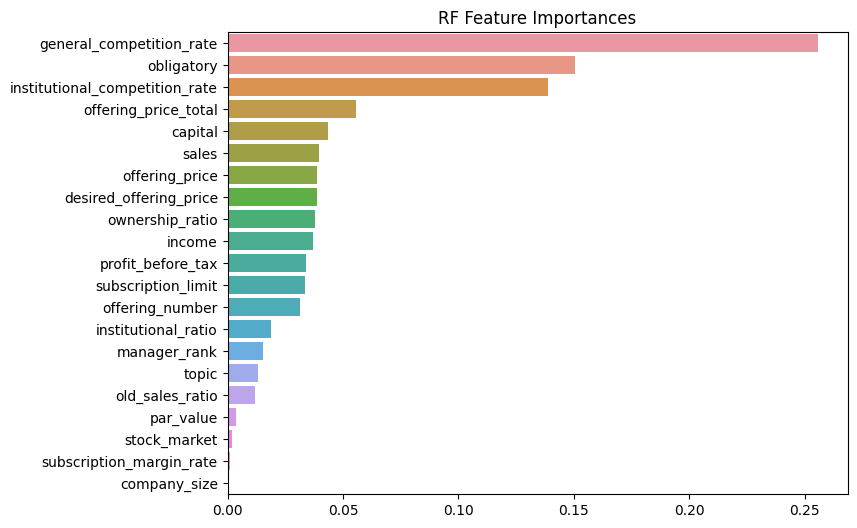

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = rf.feature_importances_

fi_values = pd.Series(feature_importances, index = X_train.columns)

fi_top = fi_values.sort_values(ascending=False)

plt.figure(figsize=(8,6))

plt.title('RF Feature Importances')
sns.barplot(x=fi_top, y=fi_top.index)
plt.show()

## XGBClassification

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
from sklearn.model_selection import StratifiedKFold

result_skfold = StratifiedKFold(n_splits=3)
idx_iter = 0
cv_accuracy = []
# KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 변환
for train_idx, test_idx in result_skfold.split(X_features,y_target):
  # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = X_features.iloc[train_idx], X_features.iloc[test_idx]
  y_train, y_test = y_target[train_idx], y_target[test_idx]
  # 학습 및 예측
  xgb.fit(X_train, y_train)
  train_pred = xgb.predict(X_train)
  test_pred = xgb.predict(X_test)
  idx_iter += 1
  # 반복 시마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test, test_pred), 4)
  print('\n{} 교차검증 정확도 : {}, 학습 데이터 크기 : {}, 검증 데이터 크기 : {}'.format(idx_iter, accuracy, X_train.shape[0], X_test.shape[0]))
  cv_accuracy.append(accuracy)
print('\n')
# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n 평균검증 정확도 : ', np.mean(cv_accuracy))


1 교차검증 정확도 : 0.8125, 학습 데이터 크기 : 736, 검증 데이터 크기 : 368

2 교차검증 정확도 : 0.913, 학습 데이터 크기 : 736, 검증 데이터 크기 : 368

3 교차검증 정확도 : 0.8913, 학습 데이터 크기 : 736, 검증 데이터 크기 : 368



 평균검증 정확도 :  0.8722666666666666


In [ ]:
train_pred = xgb.predict(X_train)
test_pred = xgb.predict(X_test)

In [ ]:
print(xgb.score(X_train, y_train))

print("roc auc : {0:.3f}".format(roc_auc_score(y_train, train_pred)))
print(f"Accuracy Score: {accuracy_score(y_train, train_pred) * 100:.2f}%")
print(f"Precision Score: {precision_score(y_train, train_pred, average='weighted') * 100:.2f}%")
print(f"Recall Score: {recall_score(y_train, train_pred, average='weighted') * 100:.2f}%")
print(f"F1-score: {f1_score(y_train, train_pred, average='weighted') * 100:.2f}%")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, train_pred)}\n")

1.0
roc auc : 1.000
Accuracy Score: 100.00%
Precision Score: 100.00%
Recall Score: 100.00%
F1-score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[368   0]
 [  0 368]]



In [ ]:
print(xgb.score(X_test, y_test))

print("roc auc : {0:.3f}".format(roc_auc_score(y_test, test_pred)))
print(f"Accuracy Score: {accuracy_score(y_test, test_pred) * 100:.2f}%")
print(f"Precision Score: {precision_score(y_test, test_pred, average='weighted') * 100:.2f}%")
print(f"Recall Score: {recall_score(y_test, test_pred, average='weighted') * 100:.2f}%")
print(f"F1-score: {f1_score(y_test, test_pred, average='weighted') * 100:.2f}%")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, test_pred)}\n")

0.8913043478260869
roc auc : 0.891
Accuracy Score: 89.13%
Precision Score: 91.07%
Recall Score: 89.13%
F1-score: 89.00%
_______________________________________________
Confusion Matrix: 
 [[144  40]
 [  0 184]]



### 파라미터 조정

In [ ]:
params = {
    'max_depth':np.arange(1, 6, 1),
    'learning_rate' : np.arange(0.05, 0.6, 0.05),
    'n_estimators' : np.arange(50, 300, 50)
    }

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier()

grid_cv = GridSearchCV(xgb, param_grid=params, cv=2, n_jobs=-1, verbose=True)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: {}'.format(grid_cv.best_params_))
print('최적 예측 정확도: {0:.3f}'.format(grid_cv.best_score_))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 2 folds for each of 275 candidates, totalling 550 fits
최적 하이퍼 파라미터: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
최적 예측 정확도: 0.814


In [ ]:
print(grid_cv.score(X_test, y_test))

0.8722826086956522


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 최적 파라미터 적용 후 모델 학습
xgb = XGBClassifier(random_state=0, learning_rate=0.1, max_depth=5, n_estimators=50)
xgb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [ ]:
print(xgb.score(X_test, y_test))

print("roc auc : {0:.3f}".format(roc_auc_score(y_test, test_pred)))
print(f"Accuracy Score: {accuracy_score(y_test, test_pred) * 100:.2f}%")
print(f"Precision Score: {precision_score(y_test, test_pred, average='weighted') * 100:.2f}%")
print(f"Recall Score: {recall_score(y_test, test_pred, average='weighted') * 100:.2f}%")
print(f"F1-score: {f1_score(y_test, test_pred, average='weighted') * 100:.2f}%")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, test_pred)}\n")

0.8722826086956522
roc auc : 0.894
Accuracy Score: 89.40%
Precision Score: 91.26%
Recall Score: 89.40%
F1-score: 89.28%
_______________________________________________
Confusion Matrix: 
 [[145  39]
 [  0 184]]



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### XGB 변수중요도 확인

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


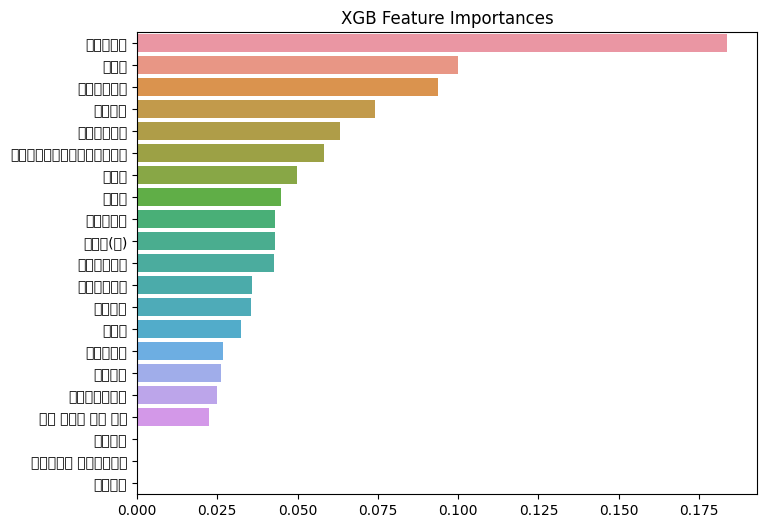

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = xgb.feature_importances_

fi_values = pd.Series(feature_importances, index = X_train.columns)

fi_top = fi_values.sort_values(ascending=False)

plt.figure(figsize=(8,6))

plt.title('XGB Feature Importances')
sns.barplot(x=fi_top, y=fi_top.index)
plt.show()

## LGBMClassification

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)

lgbm.fit(X_train, y_train)

LGBMClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedKFold

result_skfold = StratifiedKFold(n_splits=3)
idx_iter = 0
cv_accuracy = []
# KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 변환
for train_idx, test_idx in result_skfold.split(X_features,y_target):
  # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = X_features.iloc[train_idx], X_features.iloc[test_idx]
  y_train, y_test = y_target[train_idx], y_target[test_idx]
  # 학습 및 예측
  lgbm.fit(X_train, y_train)
  train_pred = lgbm.predict(X_train)
  test_pred = lgbm.predict(X_test)
  idx_iter += 1
  # 반복 시마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test, test_pred), 4)
  print('\n{} 교차검증 정확도 : {}, 학습 데이터 크기 : {}, 검증 데이터 크기 : {}'.format(idx_iter, accuracy, X_train.shape[0], X_test.shape[0]))
  cv_accuracy.append(accuracy)
print('\n')
# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n 평균검증 정확도 : ', np.mean(cv_accuracy))


1 교차검증 정확도 : 0.7989, 학습 데이터 크기 : 736, 검증 데이터 크기 : 368

2 교차검증 정확도 : 0.913, 학습 데이터 크기 : 736, 검증 데이터 크기 : 368

3 교차검증 정확도 : 0.9103, 학습 데이터 크기 : 736, 검증 데이터 크기 : 368



 평균검증 정확도 :  0.8740666666666667


In [ ]:
train_pred = lgbm.predict(X_train)
test_pred = lgbm.predict(X_test)

In [ ]:
print(lgbm.score(X_train, y_train))

print("roc auc : {0:.3f}".format(roc_auc_score(y_train, train_pred)))
print(f"Accuracy Score: {accuracy_score(y_train, train_pred) * 100:.2f}%")
print(f"Precision Score: {precision_score(y_train, train_pred, average='weighted') * 100:.2f}%")
print(f"Recall Score: {recall_score(y_train, train_pred, average='weighted') * 100:.2f}%")
print(f"F1-score: {f1_score(y_train, train_pred, average='weighted') * 100:.2f}%")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, train_pred)}\n")

1.0
roc auc : 1.000
Accuracy Score: 100.00%
Precision Score: 100.00%
Recall Score: 100.00%
F1-score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[368   0]
 [  0 368]]



In [ ]:
print(lgbm.score(X_test, y_test))

print("roc auc : {0:.3f}".format(roc_auc_score(y_test, test_pred)))
print(f"Accuracy Score: {accuracy_score(y_test, test_pred) * 100:.2f}%")
print(f"Precision Score: {precision_score(y_test, test_pred, average='weighted') * 100:.2f}%")
print(f"Recall Score: {recall_score(y_test, test_pred, average='weighted') * 100:.2f}%")
print(f"F1-score: {f1_score(y_test, test_pred, average='weighted') * 100:.2f}%")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, test_pred)}\n")

0.9103260869565217
roc auc : 0.910
Accuracy Score: 91.03%
Precision Score: 92.40%
Recall Score: 91.03%
F1-score: 90.96%
_______________________________________________
Confusion Matrix: 
 [[151  33]
 [  0 184]]



### 파라미터 조정

In [ ]:
params ={
    'n_estimators':[50, 100, 300],
    'max_depth':[-1, 6, 8, 10],
    'min_samples_leaf':[8,16,20],
    'min_samples_split':[8,16,20],
    'num_leaves':[31, 62, 93, 124]
}

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

lgbm = LGBMClassifier()

grid_cv = GridSearchCV(lgbm, param_grid=params, cv=2, n_jobs=-1, verbose=True)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: {}'.format(grid_cv.best_params_))
print('최적 예측 정확도: {0:.3f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 432 candidates, totalling 864 fits
[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: min_samples_split
최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 50, 'num_leaves': 62}
최적 예측 정확도: 0.811


In [ ]:
print(grid_cv.score(X_test, y_test))

0.9211956521739131


In [ ]:
# 최적 파라미터 적용 후 모델 학습
lgbm = LGBMClassifier(random_state=0, max_depth=-1, min_samples_leaf=8, min_samples_split=8, n_estimators=100, num_leaves=31)
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] Unknown parameter: min_samples_split


LGBMClassifier(min_samples_leaf=8, min_samples_split=8, random_state=0)

In [ ]:
test_pred = lgbm.predict(X_test)

In [ ]:
print("roc auc : {0:.3f}".format(roc_auc_score(y_test, test_pred)))
print(f"Accuracy Score: {accuracy_score(y_test, test_pred) * 100:.2f}%")
print(f"Precision Score: {precision_score(y_test, test_pred, average='weighted') * 100:.2f}%")
print(f"Recall Score: {recall_score(y_test, test_pred, average='weighted') * 100:.2f}%")
print(f"F1-score: {f1_score(y_test, test_pred, average='weighted') * 100:.2f}%")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, test_pred)}\n")

roc auc : 0.929
Accuracy Score: 92.93%
Precision Score: 93.81%
Recall Score: 92.93%
F1-score: 92.90%
_______________________________________________
Confusion Matrix: 
 [[158  26]
 [  0 184]]



#### 트리 구조 확인

In [ ]:
import lightgbm

<Axes: >

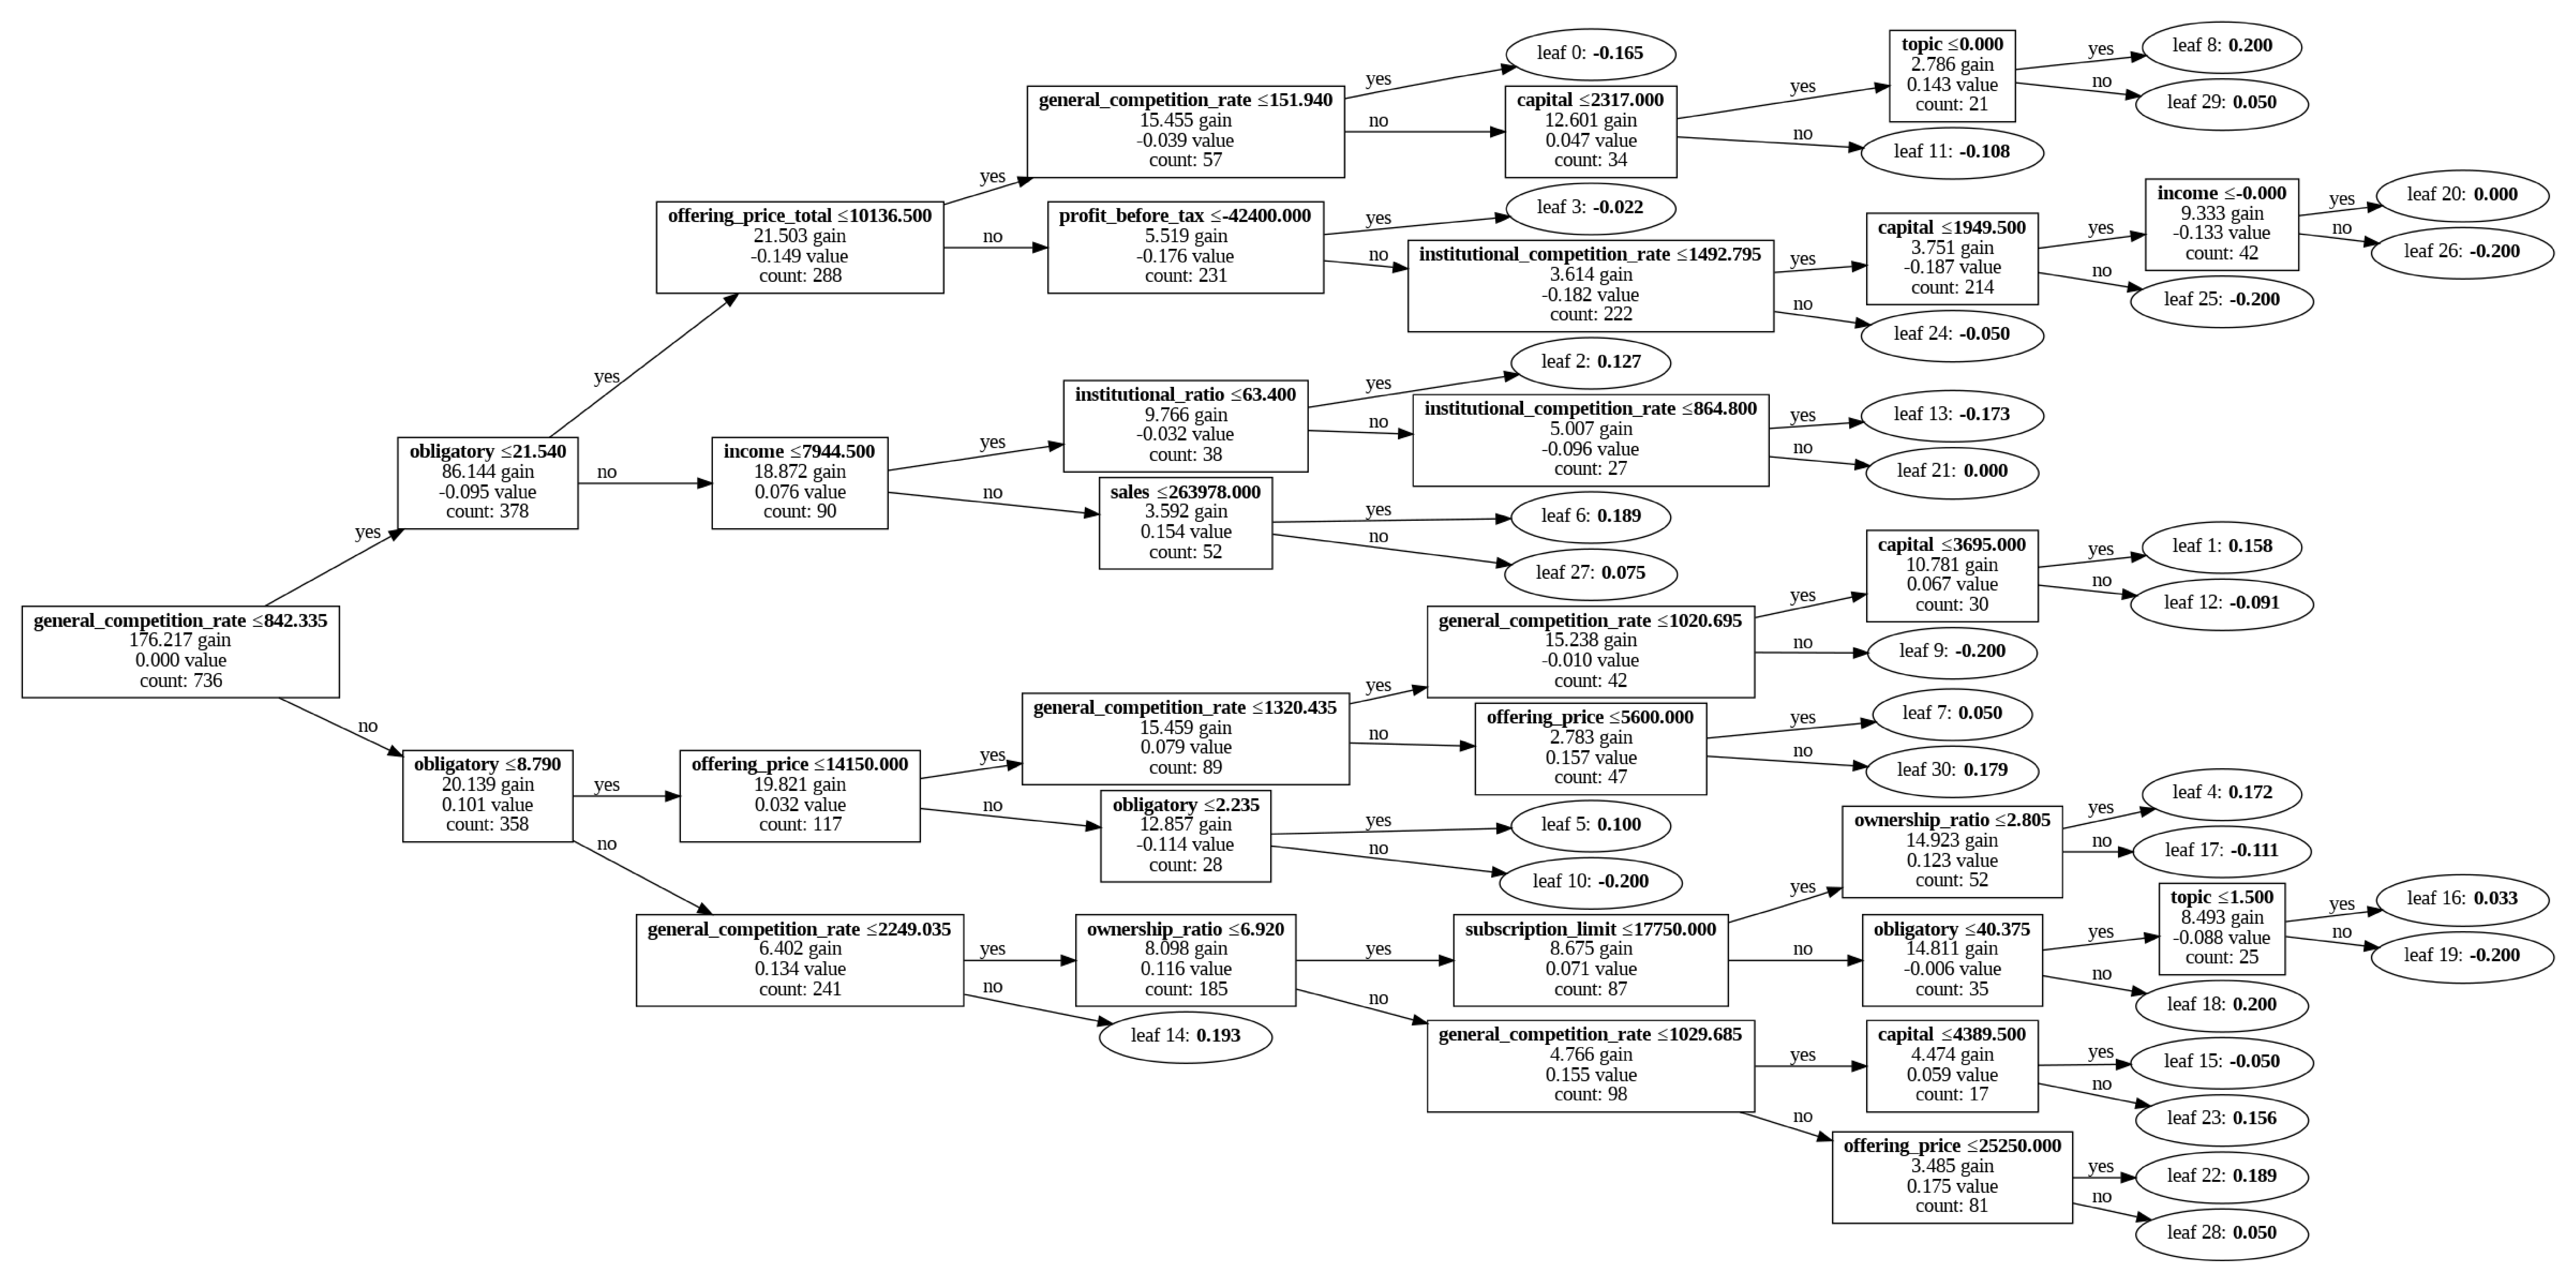

In [ ]:
lightgbm.plot_tree(lgbm, figsize=(20,20), dpi=600, show_info=['internal_value', 'internal_count', 'split_gain'])


### LGBM 변수중요도 확인

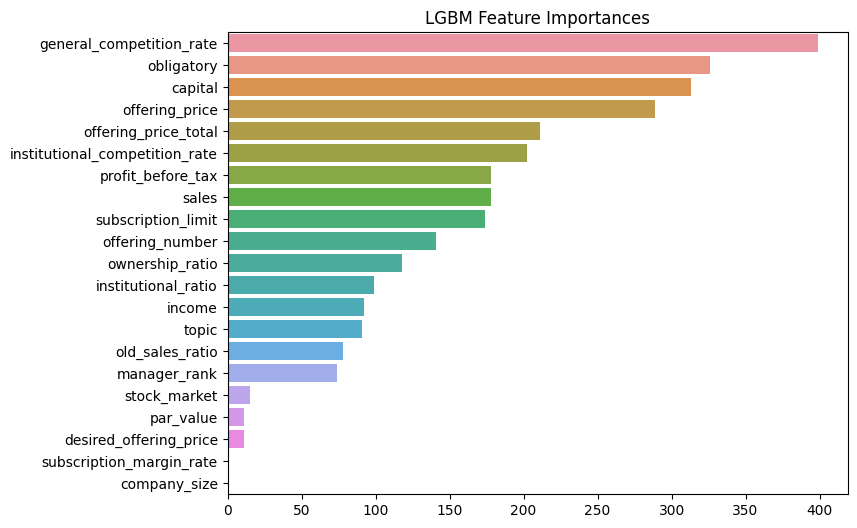

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = lgbm.feature_importances_

fi_values = pd.Series(feature_importances, index = X_train.columns)

fi_top = fi_values.sort_values(ascending=False)

plt.figure(figsize=(8,6))

plt.title('LGBM Feature Importances')
sns.barplot(x=fi_top, y=fi_top.index)
plt.show()